# Assignment 1: Classification

Machine Learning for Finance  
VU Amsterdam    

**Instructors**  
Iman van Lelyveld (iman.van.lelyveld@vu.nl)  
Dieter Wang (d.wang@vu.nl)  

<span style='color:crimson; font-weight: bold'>Submission deadline: 13 Nov 2019, 6pm CET</span>

## Instructions
* Each group submits _only one_ notebook via canvas on the assignment page.  
Not a zip folder, not the data, only one notebook file.
* The notebook should be named `assignment1_groupXX.ipynb` where `XX` is your group number,  
e.g. for group 3 this will be `assignment1_group03.ipynb`.  
* The notebook should run without raising any errors.
* We recommend the folder structure
```
assignment/
-- 1_data/
-- 2_code/
-- 3_results/
-- assignment1_groupXX.ipynb
```
* We strongly recommend git, as you are encouraged to collaborate and split up the work and maybe even start independently. To see how to set up your own repo for your group, see `L2-git-slides.pdf`, slides 20 onwards.
* Do not spend time on optimizing the speed of your code.
* We strongly encourage you to experiment, try different approaches and combinations and get to know the problem from alternative angles. But the final notebook should only contain the necessary results for grading.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Introduction

What determines sovereign credit ratings?

In this assignment you will classify country ratings based on observable charateristics. We use the Standard & Poor's Long-term bond ratings (AAA+ to D) for 108 countries. We do not use them directly but instead transform them into [EU Credit Quality Step](https://en.wikipedia.org/wiki/Credit_rating#Corporate_credit_ratings) ranging from 1 (AAA+) to 6 (D). This is stored in the column `cqs`. To facilitate the classification task, we further subdivide them into 
* `cqs_group3` has the values `rating_high=1`,`rating_medium=2` and `rating_low=3`
* `cqs_group2` has the values `rating_high=1` and `rating_low=2`

You can inspect the data to find out how `cqs`, `cqs_group2` and `cqs_group3` relate to each other.

To classify the countries, you will find the seven following features. For variable descriptions, you can visit [World Bank's World Development Indicators](http://datatopics.worldbank.org/world-development-indicators/)

In [3]:
all_features = {
    'co2':            'CO2 emissions (metric tons per capita)',
    'doctors':        'Physicians (per 1,000 people)',
    'urban_pop':      'Urban population (% of total)',
    'cellular':       'Mobile cellular subscriptions (per 100 people)',
    'deaths_infant':  'Mortality rate, under-5 (per 1,000 live births)',
    'age_dep':        'Age dependency ratio (% of working-age population)',
    'gni_growth':     'GNI growth (annual %)',
}

Let's load and have a look at the data

In [4]:
path = os.path.join('..','1_data','country_data.csv')

df_data = pd.read_csv(path)
df_data = df_data.set_index('iso3')

df_data.head(10)

cqs  cqs_group3  cqs_group2        co2   doctors  urban_pop    cellular  \
iso3                                                                            
AGO     5           3           2   1.028785  0.105500  58.258000   28.072494   
ALB     5           3           2   1.458028  1.255875  50.511333   75.836536   
ARE     1           1           1  24.222283  1.638429  83.441667  130.895154   
ARG     5           3           2   4.218718  3.344800  90.545000   97.487009   
AUS     1           1           1  17.207837  2.991500  84.992556   93.177440   
AUT     1           1           1   8.095118  4.272615  58.319500  126.768677   
AZE     4           2           2   3.791675  3.564545  53.192000   66.108836   
BEL     1           1           1   9.890098  3.050455  97.566278   97.943300   
BFA     5           3           2   0.116257  0.041250  23.564611   34.163700   
BGD     4           2           2   0.328752  0.342308  29.469500   37.960973   

      deaths_infant    age_dep  gni_growth  
iso3                                        
AGO      138.577778  98.531807    7.811246  
ALB       14.605556  50.709464    4.323332  
ARE        9.283333  21.663903    3.995919  
ARG       14.972222  58.001031    2.533325  
AUS        4.988889  49.341731    2.953411  
AUT        4.494444  48.149027    1.691040  
AZE       43.950000  45.642867   12.146821  
BEL        4.711111  52.924934    1.523743  
BFA      129.083333  95.206465    5.388608  
BGD       56.116667  59.696138    6.014959

## Preparation

Before we start the analysis, we prepare the data by labelling them correctly and splitting into targets and features. We will start with a binary classification (`cqs_group2`).

In [5]:
target_name = 'cqs_group2'

# `sr_` prefix stands for a pandas Series
sr_targets = df_data.loc[:,target_name]

These targets can take on two values.

In [6]:
label_values = [1,2]
label_names = ['rating_high', 'rating_low']

The features are as described above. Let us use the short names from now on and extract those from the dataset.

In [7]:
selected = list(all_features.keys())

# `df_` prefix stands for a pandas DataFrame
df_features = df_data.loc[:,selected]

# Question 1
**10 points**

Import the function `plot_pairwise_scatter` from `lib.plots` and visualize how the variables relate to each other. The function is used as follows
```
plot_pairwise_scatter(sr_targets, df_features, label_values)
```

Describe the data in words. What variables do you expect to be important for the classification? You can argue using economic, financial or statistical arguments. 

Furthermore, do you need to pre-process your data? If so, what type of preprocessing may be appropriate or even necessary here?

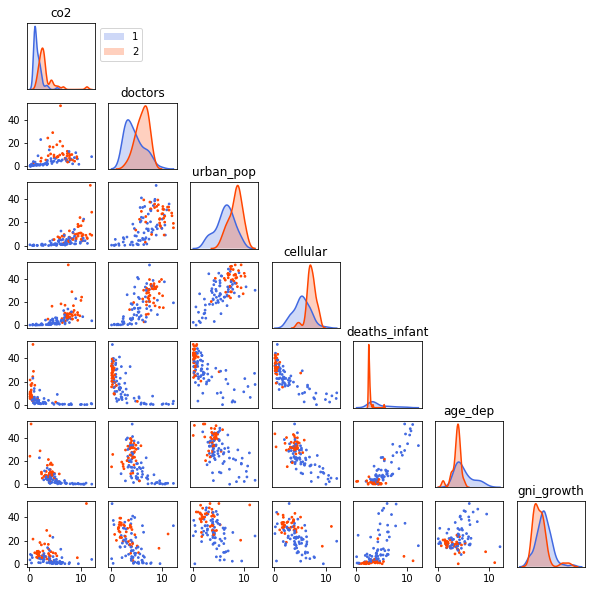

In [8]:
from lib.plots import plot_pairwise_scatter
plot_pairwise_scatter(sr_targets, df_features, label_values)

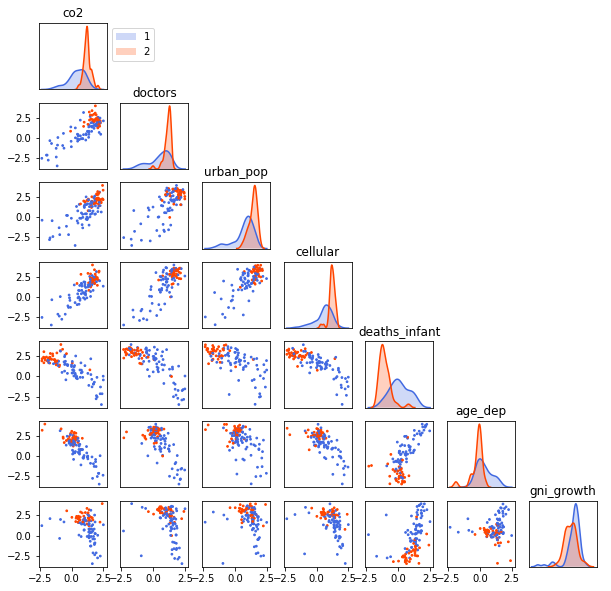

In [9]:
#take the log distribution to pre-process the data

df_features_log = np.log(df_features)
plot_pairwise_scatter(sr_targets, df_features_log, label_values)

# Question 2
**10 points**

Based on your arguments in Question 1, decide for two features. These two features `feature1, feature2` will be your inputs for the subsequent classifications.

Make a plot and describe what a linear classifier is likely to do. What challenges could it run into? 

In [10]:
feature1 = 'gni_growth'
feature2 = 'deaths_infant'

In [11]:
df_features_log['cqs_group2'] = df_data['cqs_group2']
df_features_log.head()

co2   doctors  urban_pop  cellular  deaths_infant   age_dep  \
iso3                                                                     
AGO   0.028379 -2.249044   4.064881  3.334790       4.931432  4.590379   
ALB   0.377085  0.227833   3.922198  4.328580       2.681402  3.926113   
ARE   3.187273  0.493738   4.424148  4.874397       2.228221  3.075647   
ARG   1.439531  1.207407   4.505847  4.579719       2.706197  4.060461   
AUS   2.845365  1.095775   4.442564  4.534506       1.607213  3.898770   

      gni_growth  cqs_group2  
iso3                          
AGO     2.055564           2  
ALB     1.464026           2  
ARE     1.385274           1  
ARG     0.929533           2  
AUS     1.082961           1

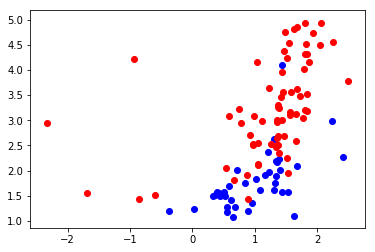

In [12]:
plt.scatter(df_features_log[feature1][df_features_log.cqs_group2 == 1], df_features_log[feature2][df_features_log.cqs_group2 == 1], c='Blue')
plt.scatter(df_features_log[feature1][df_features_log.cqs_group2 == 2], df_features_log[feature2][df_features_log.cqs_group2 == 2], c='Red')

---

# Question 3
**15 points**

Use a linear support vector machine from the `sklearn.svm` module and plot the results. 

For the plot, import `plot_classification_contours` from `lib.plots`. Use it like this
```
plot_classification_contours(X, y, clf, [feature1,feature2])
```
where `clf` is the sklearn classifier object. `X` is a numpy array with `[n_obs, n_features]` dimensions and `y` is a numpy array with `[n_obs,]` dimensions.

**Hint:** You can leave the default options of your classifier. But if you decide to adjust them, please give an explanation.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


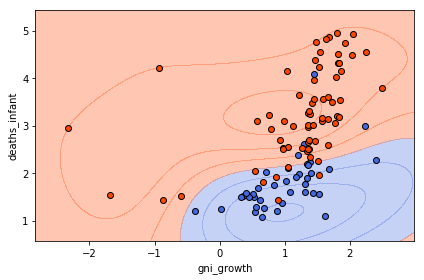

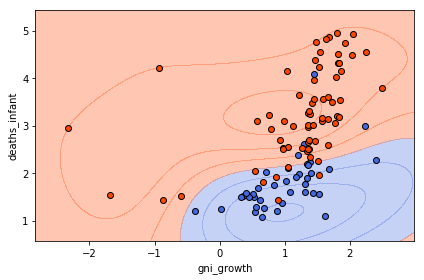

In [17]:
from lib.plots import plot_classification_contours
import sklearn.svm as svm

X = np.array(df_features_log.loc[:, [feature1,feature2]])
y = np.array(sr_targets)

clf = svm.SVC().fit(X, y)


plot_classification_contours(X, y, clf, [feature1,feature2])

# Question 4
**25 points**

How well did the classification go? 

Make predictions and call them `y_pred`. Write four functions to compute the four elements of a confusion matrix. Name them appropriately and cross check their results with the output of the following plot
```
plot_confusion_matrix(y, y_pred, label_names, normalize=True)
```
Once again, you can import this function from `lib.plots`.

Furthermore, write two functions to compute the precision and recall of your classifier. 

**Hint:** The functions you write should have the following structure:
```
def true_positive(y_true, y_pred):
    # magic
    return TP
```
It is important here that `y_true` and `y_pred` follow the same binary classifications and agree on what's "positive" and whats "negative".

In [ ]:
## Your answer

---

# Question 5
**15 points**

Change the classifier to a radial basis function and discuss the results. Does it do better than the linear classifier? If so, in what respect? If not, why? Is the confusion matrix different?

**Hint:** In sklearn, the `gamma` parameter may need some adjustment, depending on your features.

In [ ]:
## Your answer

---

# Question 6
**15 points**

Let us know consider a third feature `feature3` as an additional predictor variable. Look at the previous pairplot for this purpose and identify a third input.

In [ ]:
feature3 = ''

You can again visualize the three features using 
```
selected = [feature1,feature2,feature3]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_values)
```

Use this new feature and rerun the classification. Does the new feature improve the predictions, or is it possible that it does worse? Please explain.

In [ ]:
## Your answer

---

# Question 7
**10 points**

Finally, let us switch from a binary classification to a classification of three outcomes. This corresponds to the columns `cqs_group3`, where we have `rating_high`, `rating_medium` and `rating_low`.

In [ ]:
target_name = 'cqs_group3'

sr_targets = df_data.loc[:,target_name]

In [ ]:
label_values = [1,2,3]
label_names = ['rating_high', 'rating_mid', 'rating_low']

You can again use the 
```
selected = [feature1,feature2,feature3]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_values)
```
command to visualize your data.

Inspect the classification results. Can you use the functions you defined previously to asses the results, or do you need to make adjustments? If so, do you have to completely rewrite the functions or are only minor adjustments necessary?

## Bonus question
**10 points**
Compute the confusion matrix.  
Compute precision and recall for this case.

In [ ]:
## Your answer

---